## Face Detection

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
nadia=cv2.imread('nadia_murad.jpg',0)
denis=cv2.imread('Denis_Mukwege.jpg',0)
solvay=cv2.imread('solvay_conference.jpg',0)                 

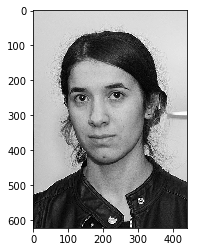

In [3]:
plt.imshow(nadia,cmap='gray')

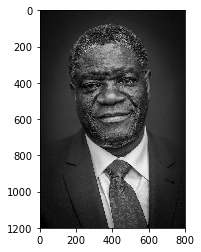

In [4]:
plt.imshow(denis,cmap='gray')

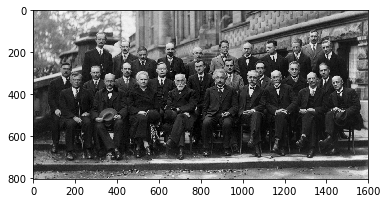

In [5]:
plt.imshow(solvay,cmap='gray')

In [6]:
face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


In [19]:
def face_detect(img):
    face_img=img.copy()
    face_rects=face_cascade.detectMultiScale(face_img,scaleFactor=1.2, minNeighbors=5)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(0,255,0),5)
        
    return face_img

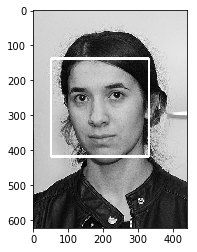

In [8]:
nadia_img=face_detect(nadia)
plt.imshow(nadia_img,cmap='gray')

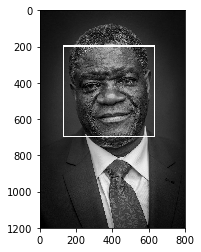

In [9]:
denis_img=face_detect(denis)
plt.imshow(denis_img,cmap='gray')

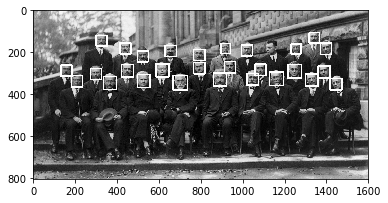

In [10]:
#Notice how we can see some multiple rectangles on same face and a wall being detected to fix this we can add
#scale factors and min neighbors in face_rects
#But it misses to detect one face who is not looking directly in the camera
solvay_img=face_detect(solvay)
plt.imshow(solvay_img,cmap='gray')

## Eye Detection

In [11]:
eye_cascade=cv2.CascadeClassifier('C:/Users/sreev/Downloads/OpenCvCourse/Computer-Vision-with-Python/DATA/haarcascades/haarcascade_eye.xml')


In [12]:
def eye_detect(img):
    eye_img=img.copy()
    eye_rects=eye_cascade.detectMultiScale(eye_img)
    
    for (x,y,w,h) in eye_rects:
        cv2.rectangle(eye_img,(x,y),(x+w,y+h),(255,255,255),5)
        
    return eye_img

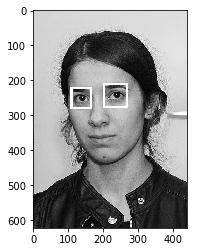

In [13]:
eye_nadia=eye_detect(nadia)
plt.imshow(eye_nadia,cmap='gray')

## Face Detection in Video

In [21]:
cap=cv2.VideoCapture(0)

while True:
    ret,frame=cap.read(0)
    face=face_detect(frame)
    cv2.imshow('Video Face Detection',face) 
    
    if cv2.waitKey(10) & 0xFF==27:
         break
cap.release()
cv2.destroyAllWindows()
    